In this workbook we want to create a Dataset, that we can load into our local PostGres-Database and then do some visualisations via Tableau

We do the same cleaning like Workbook 02

In [1]:
#Importing the necessary libraries
import pandas as pd             # pandas for data frame
import numpy as np              # numpy for array

import matplotlib.pyplot as plt # for plotting
# Will allow us to embed images in the notebook
%matplotlib inline
from matplotlib.cbook import _reshape_2D

# Seaborn visualization library
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
import seaborn as sns

For SQL

In [2]:
from sql_functions import *     # functions from file for upload on schema
import psycopg2                 # for upload on engine

# Import the get_engine function from our sql_functions.
from sql_functions import get_engine #adjust this as necessary to match your sql_functions.py connection methods

# Import get_dataframe from sql_functions.py
from sql_functions import get_dataframe

# create a variable called engine using the get_engine function
engine = get_engine()

We want to see all

In [3]:
# Set the option to prevent truncation of column names
pd.set_option('display.max_columns', None)


We create empty DataFrames

In [4]:
# create an empty dataframe
df = pd.DataFrame()
games = pd.DataFrame()

Loading the Data

In [5]:
#Loading the DataSet games.csv from the folder sgd_data with Python Pandas
# The games.csv file is in the sgd_data folder
# The file is to large for the Upload to GitHub, so you have to download it from the following link:
# https://www.kaggle.com/datasets/fronkongames/steam-games-dataset?resource=download

games = pd.read_csv('sgd_data/games.csv')

Creating a Copy

In [6]:
# Load the CSV file into a DataFrame as a copy
df = games

Just checking in

In [7]:
# Display the information of the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76987 entries, 0 to 76986
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       76987 non-null  int64  
 1   Name                        76985 non-null  object 
 2   Release date                76987 non-null  object 
 3   Estimated owners            76987 non-null  object 
 4   Peak CCU                    76987 non-null  int64  
 5   Required age                76987 non-null  int64  
 6   Price                       76987 non-null  float64
 7   DLC count                   76987 non-null  int64  
 8   About the game              74070 non-null  object 
 9   Supported languages         76987 non-null  object 
 10  Full audio languages        76987 non-null  object 
 11  Reviews                     9362 non-null   object 
 12  Header image                76987 non-null  object 
 13  Website                     366

None

checking for Missing Values

In [8]:
# Check for missing values
display(df.isnull().sum())

AppID                             0
Name                              2
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2917
Supported languages               0
Full audio languages              0
Reviews                       67625
Header image                      0
Website                       40308
Support url                   38759
Support email                 12090
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                73195
User score                        0
Positive                          0
Negative                          0
Score rank                    76945
Achievements                      0
Recommendations                   0
Notes                       

and plotting it

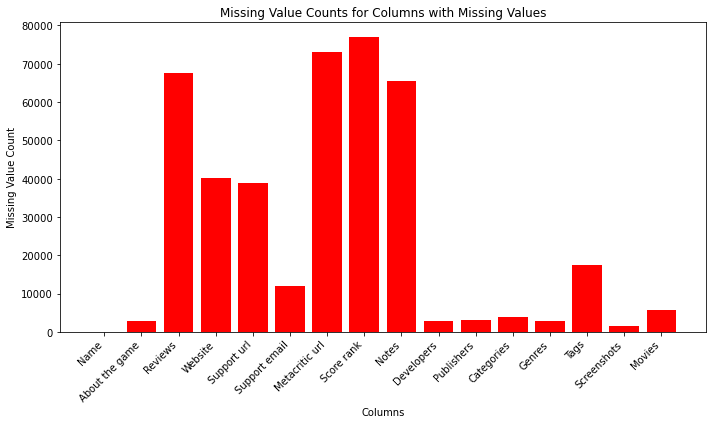

In [9]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_counts[missing_counts > 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for missing values
plt.bar(missing_columns.index, missing_columns.values, color='red')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Counts for Columns with Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


----

Do some normalizing

In [10]:
# Normalize column headers
df.columns = df.columns.str.lower()  # Convert to lowercase
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.columns = df.columns.str.replace('[^\w\s]', '')  # Remove special characters

print("Normalized column headers:")
print(df.columns)

Normalized column headers:
Index(['appid', 'name', 'release_date', 'estimated_owners', 'peak_ccu',
       'required_age', 'price', 'dlc_count', 'about_the_game',
       'supported_languages', 'full_audio_languages', 'reviews',
       'header_image', 'website', 'support_url', 'support_email', 'windows',
       'mac', 'linux', 'metacritic_score', 'metacritic_url', 'user_score',
       'positive', 'negative', 'score_rank', 'achievements', 'recommendations',
       'notes', 'average_playtime_forever', 'average_playtime_two_weeks',
       'median_playtime_forever', 'median_playtime_two_weeks', 'developers',
       'publishers', 'categories', 'genres', 'tags', 'screenshots', 'movies'],
      dtype='object')


/var/folders/yg/z64xf8615mxbsw25_zldzjnm0000gn/T/ipykernel_2494/773374837.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^\w\s]', '')  # Remove special characters


confertig to datetime

In [11]:
# Convert 'Release date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

print("DataFrame with 'Release date' in datetime format:")
display(df.head(3))

DataFrame with 'Release date' in datetime format:


,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,about_the_game,supported_languages,full_audio_languages,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,user_score,positive,negative,score_rank,achievements,recommendations,notes,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks,developers,publishers,categories,genres,tags,screenshots,movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


-----

Now some cleaning

If a game has no "Name" we will delete it. Without a name we assume an error happened and therefore want to delete this

In [12]:
# Delete rows where the values in the 'Name' column are missing
df_cleaned = df[df['name'].notnull()]
display(df_cleaned.head(3))

,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,about_the_game,supported_languages,full_audio_languages,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,user_score,positive,negative,score_rank,achievements,recommendations,notes,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks,developers,publishers,categories,genres,tags,screenshots,movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


before we go to SQL, we drop all non-essential columns. We mostly would drop all non-INTEGER values.

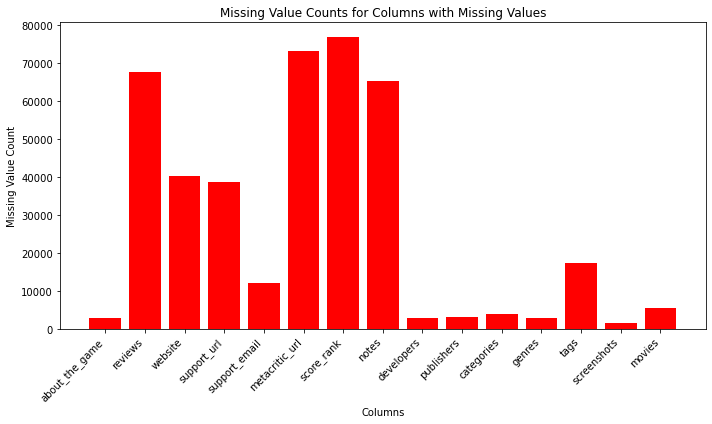

In [13]:
# Calculate the count of missing values in each column
missing_counts = df_cleaned.isnull().sum()

# Filter columns with missing values
missing_columns = missing_counts[missing_counts > 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for missing values
plt.bar(missing_columns.index, missing_columns.values, color='red')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Counts for Columns with Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
# Columns to drop because of missing values
columns_to_drop = ['website', 
                    'support_url', 
                    'support_email',
                    'about_the_game',
                    'score_rank',
                    'notes',
                    'reviews',
                    'metacritic_url',
                    'developers', 
                    'publishers', 
                    'categories', 
                    'genres', 
                    'tags', 
                    'screenshots', 
                    'movies']

# Drop the specified columns
df_small = df_cleaned.drop(columns=columns_to_drop)


check again for missing values

In [15]:
# Check for missing values
missing_values_small = df_small.isnull()

# Count the number of missing values in each column
missing_counts_small = missing_values_small.sum()

print("Missing value counts for each column:")
display(missing_counts_small)

Missing value counts for each column:


appid                         0
name                          0
release_date                  0
estimated_owners              0
peak_ccu                      0
required_age                  0
price                         0
dlc_count                     0
supported_languages           0
full_audio_languages          0
header_image                  0
windows                       0
mac                           0
linux                         0
metacritic_score              0
user_score                    0
positive                      0
negative                      0
achievements                  0
recommendations               0
average_playtime_forever      0
average_playtime_two_weeks    0
median_playtime_forever       0
median_playtime_two_weeks     0
dtype: int64

We know from the Workbook 03 that we also have other Columns we might want to delete, too.

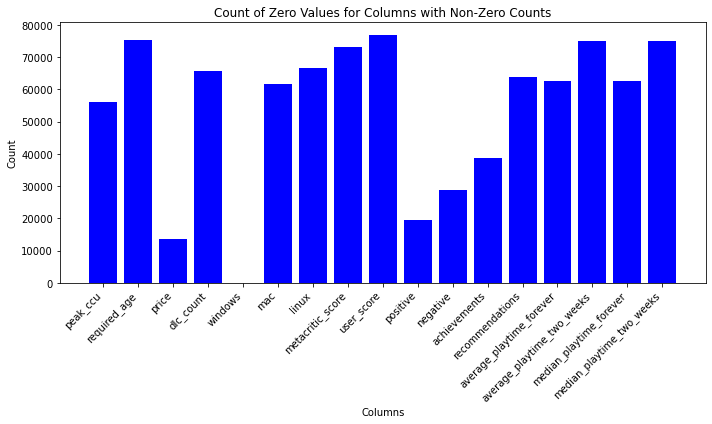

In [16]:
#Checking Data for entries with 0 values
count_data = []

for column_name in df_small.columns:
    count_zero = (df_small[column_name] == 0).sum()
    
    if count_zero > 0:
        count_data.append((column_name, count_zero))

if count_data:
    column_names, counts = zip(*count_data)
    plt.figure(figsize=(10, 6))
    plt.bar(column_names, counts, color='blue')
    plt.title('Count of Zero Values for Columns with Non-Zero Counts')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No columns with non-zero count of zero values found.")


What does this graphic actually mean?
So we checked the Dataset, how often a Column has only the value "0" in a row. We assume that a "0" means that their is no Data available.

We can also express that in numbers:

In [17]:
# Read your DataFrame from your source (replace with your actual data)
# df = pd.read_csv('your_data.csv')

for column_name in df_small.columns:
    count_zero = (df_small[column_name] == 0).sum()
    count_not_null = df_small[column_name].notnull().sum()
    
    if pd.api.types.is_numeric_dtype(df_small[column_name]):
        count_greater_than_zero = (df_small[column_name] > 0).sum()
    else:
        count_greater_than_zero = "N/A"
    
    display(f"Column: {column_name}")
    display(f"Columns has rows of Not Null: {count_not_null}, How often is Greater Than Zero: {count_greater_than_zero}, How often is Zero: {count_zero}")
    display("=" * 40)


'Column: appid'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 76985, How often is Zero: 0'

'========================================'

'Column: name'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

'========================================'

'Column: release_date'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

'========================================'

'Column: estimated_owners'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

'========================================'

'Column: peak_ccu'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 20926, How often is Zero: 56059'

'========================================'

'Column: required_age'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 1561, How often is Zero: 75424'

'========================================'

'Column: price'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 63299, How often is Zero: 13686'

'========================================'

'Column: dlc_count'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 11259, How often is Zero: 65726'

'========================================'

'Column: supported_languages'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

'========================================'

'Column: full_audio_languages'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

'========================================'

'Column: header_image'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: N/A, How often is Zero: 0'

'========================================'

'Column: windows'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 76958, How often is Zero: 27'

'========================================'

'Column: mac'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 15156, How often is Zero: 61829'

'========================================'

'Column: linux'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 10420, How often is Zero: 66565'

'========================================'

'Column: metacritic_score'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 3792, How often is Zero: 73193'

'========================================'

'Column: user_score'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 42, How often is Zero: 76943'

'========================================'

'Column: positive'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 57539, How often is Zero: 19446'

'========================================'

'Column: negative'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 48275, How often is Zero: 28710'

'========================================'

'Column: achievements'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 38194, How often is Zero: 38791'

'========================================'

'Column: recommendations'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 13057, How often is Zero: 63928'

'========================================'

'Column: average_playtime_forever'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 14450, How often is Zero: 62535'

'========================================'

'Column: average_playtime_two_weeks'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 1936, How often is Zero: 75049'

'========================================'

'Column: median_playtime_forever'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 14450, How often is Zero: 62535'

'========================================'

'Column: median_playtime_two_weeks'

'Columns has rows of Not Null: 76985, How often is Greater Than Zero: 1936, How often is Zero: 75049'

'========================================'

In [18]:
display(df_small.head(3))

,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,supported_languages,full_audio_languages,header_image,windows,mac,linux,metacritic_score,user_score,positive,negative,achievements,recommendations,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,['English'],[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,False,False,0,0,6,11,30,0,0,0,0,0
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,True,False,0,0,53,5,12,0,0,0,0,0
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],https://cdn.akamai.steamstatic.com/steam/apps/...,True,False,False,0,0,0,0,0,0,0,0,0,0


We could try to automatically delete these column due to a Portion of missing values, but that would probably also kill interesting columns like games for "Linux" and "Mac".

So its better to do that manually. 

In [19]:
# Columns to drop because of missing values
columns_to_drop = ['peak_ccu', 'header_image']

# Drop the specified columns
df_tableau = df_small.drop(columns=columns_to_drop)


----

Lets try to put that in a PostGres-SQL - Enviroment

In [20]:
# export the data frame to DBeaver

# call the schema created for this project
schema = 'public'

# give the table a unique name
table_name = 'sgd_workbook_tableau'

In [21]:
print(schema)
print(table_name)

public
sgd_workbook_tableau


delete any existing table

In [22]:
# Delete sgd_workbook_small table if it exists
sql_text = f"""
DROP TABLE IF EXISTS {schema}.{table_name};
    """ 
# Take the SQL-Command and execute it
result = engine.execute(sql_text)

Creating a fresh table in PostGres

In [23]:
# export the table to sql
if engine!=None:
    try:
        df_tableau.to_sql(name=table_name,
                        con=engine,
                        if_exists='replace',
                        schema=schema, 
                        index=False,
                        chunksize=5000, 
                        method='multi')
        print(f"The {table_name} table was imported successfully.")
    
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The sgd_workbook_tableau table was imported successfully.


check the import

In [24]:
# Select the Data from PostGreDatabase

sql = f"""

SELECT *
FROM {schema}.{table_name} as sgd_workbook_small


""" 
# Take the SQL-Command and import all Data from the PostGreDatabase to the variable sgd_workbook_small 
sgd_tableau = get_dataframe(sql) 
display(sgd_tableau.head(3))

,appid,name,release_date,estimated_owners,required_age,price,dlc_count,supported_languages,full_audio_languages,windows,mac,linux,metacritic_score,user_score,positive,negative,achievements,recommendations,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,19.99,0,['English'],[],True,False,False,0,0,6,11,30,0,0,0,0,0
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,False,0,0,53,5,12,0,0,0,0,0
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,4.99,0,"['English', 'Portuguese - Brazil']",[],True,False,False,0,0,0,0,0,0,0,0,0,0


We now have created a Database for Tableau, which we can now use for further visualisation.